In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import openpyxl

# Dataset Generation

In [2]:
val_arousal = pd.read_csv("data/csv/muse_v3.csv")
val_arousal = val_arousal[['track', 'artist', 'valence_tags', 'arousal_tags', 'dominance_tags', 'genre']]
val_arousal['track'] = val_arousal['track'].str.lower()
val_arousal['artist'] = val_arousal['artist'].str.lower()
df = pd.read_csv("data/csv/tracks.csv")
df = df[['name', 'popularity', 'duration_ms', 'artists', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
df['name'] = df['name'].str.lower()
df = df[df[['name', 'artists']].duplicated(keep = False) == False]
df = df[df['name'].isin(val_arousal['track'])]

In [3]:
def transform_row(row):
    output = ""
    for i in eval(row):
        output += i.lower() + " & "
    return output[:-3]
df['artists'] = df['artists'].apply(transform_row)

In [4]:
val_arousal.set_index(pd.MultiIndex.from_frame(val_arousal[['track', 'artist']]), inplace = True)
val_arousal = val_arousal[['valence_tags', 'arousal_tags', 'dominance_tags', 'genre']]

In [5]:
merged_df = df.join(val_arousal, on = ['name', 'artists'], how = 'inner')

In [6]:
merged_df

,name,popularity,duration_ms,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,valence_tags,arousal_tags,dominance_tags,genre
154,need a little sugar in my bowl,27,167640,bessie smith,0.693,0.0270,0,-13.506,0,0.0562,0.99200,0.000000,0.1340,0.402,75.749,3.909552,4.298881,5.670896,blues
3895,i know his blood can make me whole,16,182840,blind willie johnson,0.559,0.2100,1,-13.594,0,0.0718,0.97100,0.000017,0.1030,0.550,105.208,3.686071,3.739643,5.532143,blues
5543,it's all forgotten now,11,203067,al bowlly,0.582,0.0317,0,-21.242,1,0.0462,0.98800,0.000261,0.0595,0.244,81.228,3.933333,5.783333,4.220000,jazz
6476,caroni swamp,4,179435,phil madison,0.611,0.2860,5,-10.853,1,0.2170,0.99400,0.000001,0.4050,0.452,82.857,6.650000,4.770000,5.310000,NaN
8105,till the cows come home,36,172973,lucille bogan,0.682,0.1320,7,-11.006,1,0.1210,0.98700,0.000000,0.1850,0.731,118.436,5.495000,5.490000,5.957500,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585654,batman,19,94307,the who,0.515,0.8670,2,-2.910,1,0.0474,0.00129,0.392000,0.1560,0.123,141.202,6.720000,4.860000,6.500000,rock
586003,moon and the stars,22,214960,earl klugh,0.384,0.1200,7,-24.773,1,0.0429,0.95400,0.925000,0.1160,0.877,174.110,6.760000,3.310000,6.380000,smooth jazz
586073,(song for my) sugar spun sister,24,204800,the stone roses,0.362,0.5700,9,-16.262,1,0.0369,0.07560,0.001670,0.2260,0.571,121.032,6.316129,4.552903,5.738065,indie
586481,unfriend you,48,200800,greyson chance,0.624,0.8930,7,-4.317,1,0.0496,0.00278,0.000000,0.0589,0.537,130.939,3.630000,4.640000,4.580000,pop


In [7]:
#merged_df.to_csv("data/csv/prediction_dataset.csv")

In [8]:
merged_df.columns

Index(['name', 'popularity', 'duration_ms', 'artists', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'valence_tags',
       'arousal_tags', 'dominance_tags', 'genre'],
      dtype='object')

# Linear Regression

In [14]:
#for genre in genres:
#    temp = merged_df[merged_df['genre'] == genre]
#    temp.drop(['artists', 'genre'], inplace = True, axis = 1)
#    temp.to_excel(f"data/linear_model/{genre}.xlsx")

/tmp/ipykernel_19292/613528293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['artists', 'genre'], inplace = True, axis = 1)
/tmp/ipykernel_19292/613528293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['artists', 'genre'], inplace = True, axis = 1)
/tmp/ipykernel_19292/613528293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(['artists', 'genre'], inplace = True, axis = 1)
/tmp/ipykernel_1

In [9]:
def residual(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # output: a list of residuals corresponding to each X in the input
    predictions = regression_model.predict(X_test)
    return y_test - predictions

def plotResidualHistogram(regression_model, X_test, y_test):
    # inputs: the regression model, test X and test y from the previous question
    # Compute the residuals using the previous residual function
    # Loop through the attributes and plot a histogram for the residuals
    # Output: None, simply plot the histogram
    residuals = residual(regression_model, X_test, y_test)
    plt.hist(residuals, bins = 100)
    plt.title('Residual Histogram')
    plt.xlabel('Residual')
    plt.ylabel('Num of Observations')
    plt.show()
    return

def plotResidualsVsAttributes(regression_model, X_test, y_test, attributes):
    # inputs: the regression model, test X and test y from the previous question, and a list of columns to plot residuals against
    # Compute the residuals using the previous function
    # Loop through the attributes and plot a scatter plot for each column's data and the residuals
    # Output: None, simply plot the graphs
    residuals = residual(regression_model, X_test, y_test)
    for attr in attributes:
        plt.scatter(X_test[attr], residuals)
        plt.title('Scatter plot of Residual vs {}'.format(attr))
        plt.xlabel(attr)
        plt.ylabel('Residual')
        plt.show()
    return

In [22]:
X_dict = {
    "rock": ['danceability', 'loudness', 'speechiness', 'instrumentalness', 'valence', 'valence_tags'],
    "jazz": ['danceability', 'acousticness', 'valence', 'valence_tags'],
    "electronic": ['key'],
    "country": ['duration_ms', 'key', 'arousal_tags']
}
#X = ['valence_tags', 'arousal_tags']
Y = 'popularity'
genres = ['rock', 'jazz', 'electronic', 'country']

In [23]:
merged_df = merged_df[merged_df['genre'].isin(genres)]

In [24]:
merged_df['genre'].value_counts()

rock          754
jazz          214
electronic    167
country        88
Name: genre, dtype: int64

---------------rock--------------------
                  danceability  loudness  speechiness  instrumentalness  \
danceability          1.000000 -0.013798     0.019441         -0.135239   
loudness             -0.013798  1.000000     0.030956         -0.147267   
speechiness           0.019441  0.030956     1.000000         -0.028871   
instrumentalness     -0.135239 -0.147267    -0.028871          1.000000   
valence               0.503993  0.187468     0.134489         -0.062304   
valence_tags          0.113533  0.206193     0.033053         -0.036570   
popularity            0.009723  0.347400    -0.090078         -0.130496   

                   valence  valence_tags  popularity  
danceability      0.503993      0.113533    0.009723  
loudness          0.187468      0.206193    0.347400  
speechiness       0.134489      0.033053   -0.090078  
instrumentalness -0.062304     -0.036570   -0.130496  
valence           1.000000      0.107384   -0.134471  
valence_tags      0.107384   

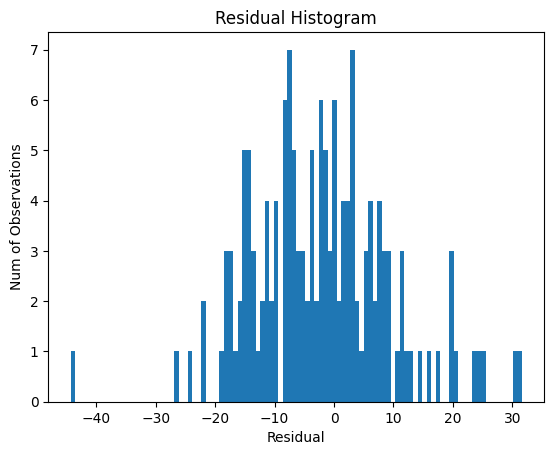

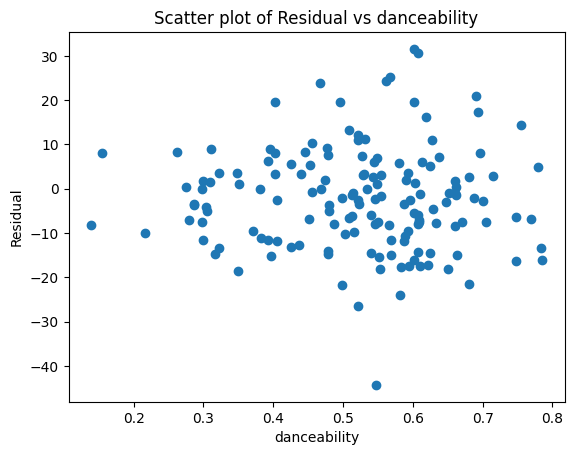

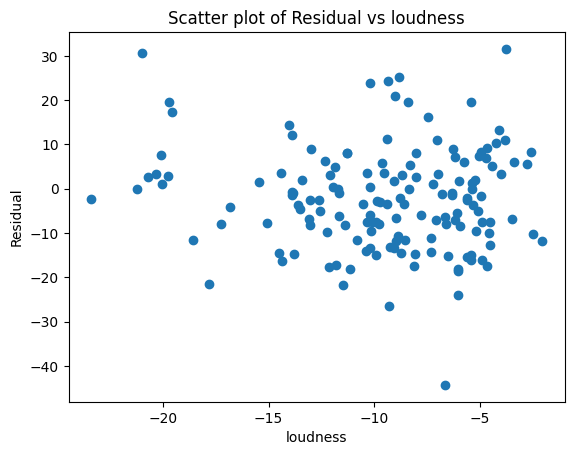

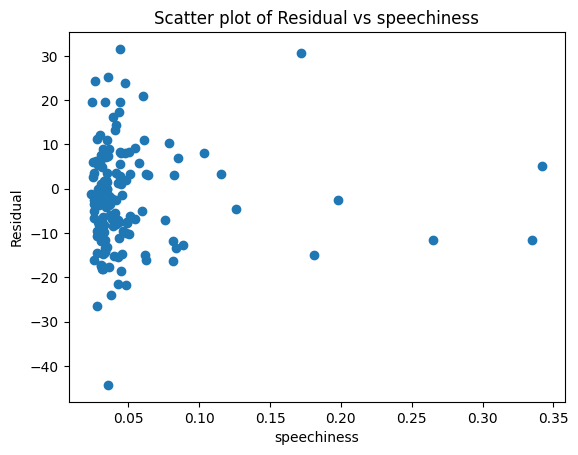

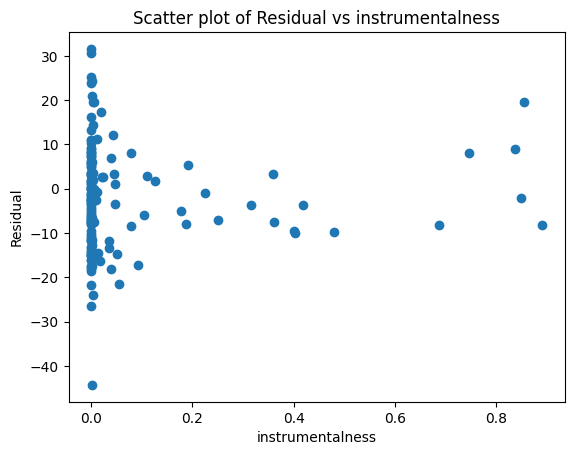

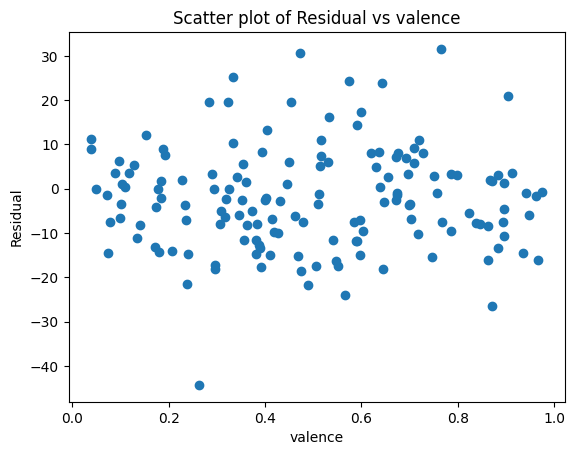

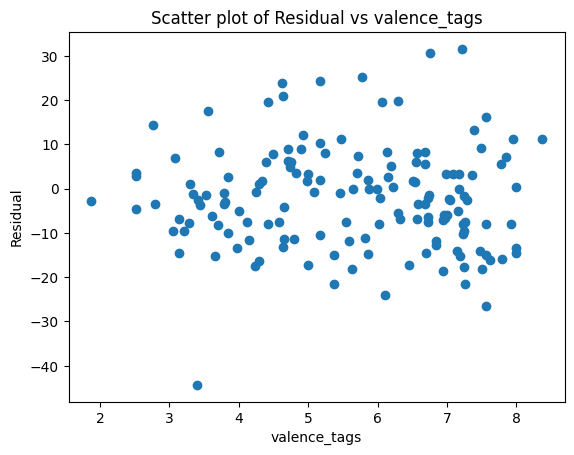

---------------jazz--------------------
              danceability  acousticness   valence  valence_tags  popularity
danceability      1.000000     -0.191581  0.669074      0.056160    0.071048
acousticness     -0.191581      1.000000 -0.211844      0.012764   -0.139175
valence           0.669074     -0.211844  1.000000      0.081930   -0.077251
valence_tags      0.056160      0.012764  0.081930      1.000000    0.167212
popularity        0.071048     -0.139175 -0.077251      0.167212    1.000000
R2 of training: 0.08329194857539568
R2 of test: 0.029089009931457688
Test loss: 24759.864398197322


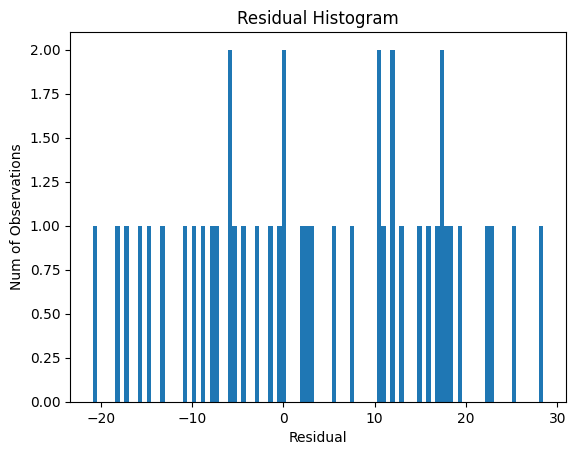

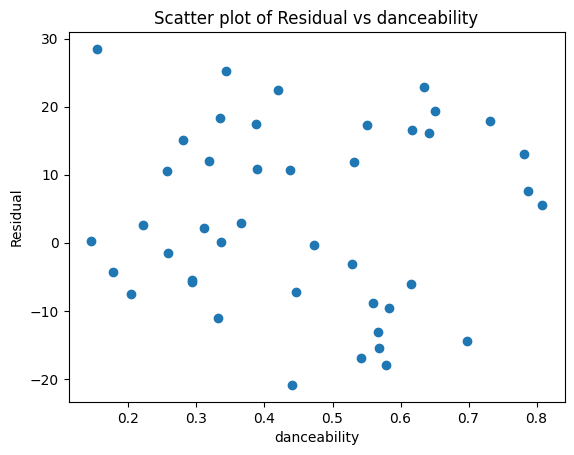

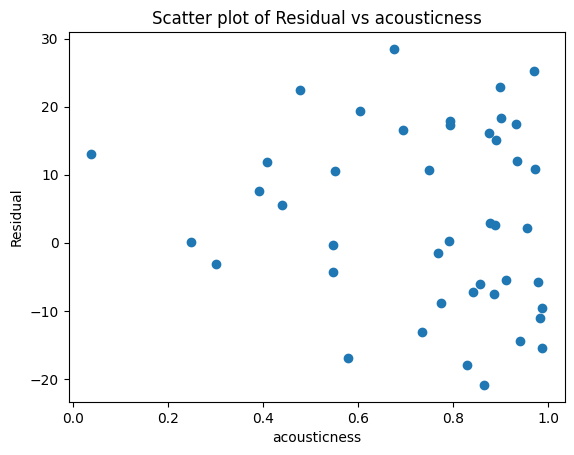

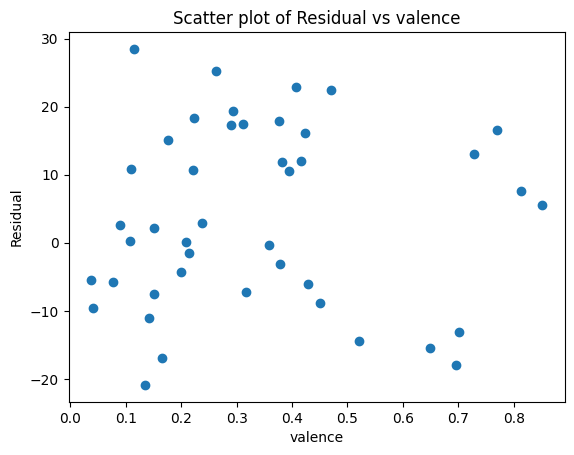

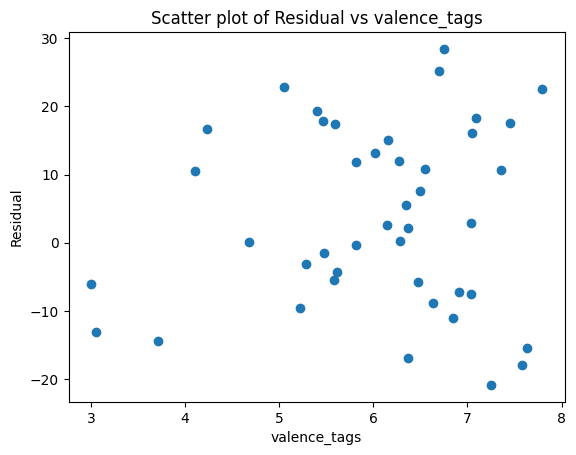

---------------electronic--------------------
                 key  popularity
key         1.000000   -0.166435
popularity -0.166435    1.000000
R2 of training: 0.02615491497169742
R2 of test: 0.02458986231853688
Test loss: 3785.494345491534


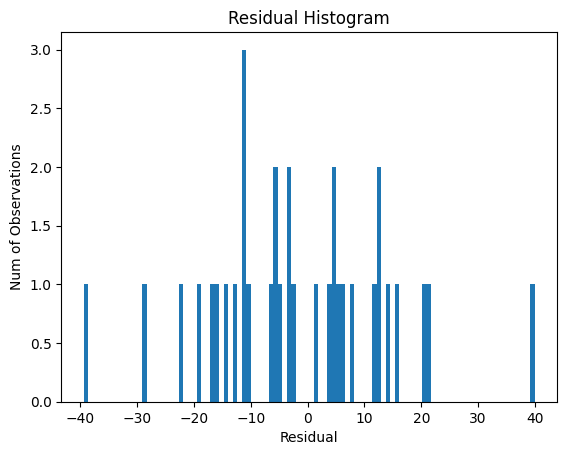

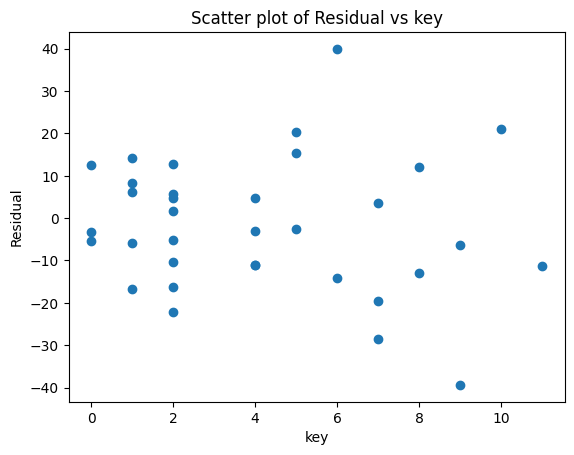

---------------country--------------------
              duration_ms       key  arousal_tags  popularity
duration_ms      1.000000  0.070720     -0.204239    0.257906
key              0.070720  1.000000      0.025531   -0.168559
arousal_tags    -0.204239  0.025531      1.000000    0.253055
popularity       0.257906 -0.168559      0.253055    1.000000
R2 of training: 0.17550023307880203
R2 of test: 0.2911329290921668
Test loss: 2240.6575507046173


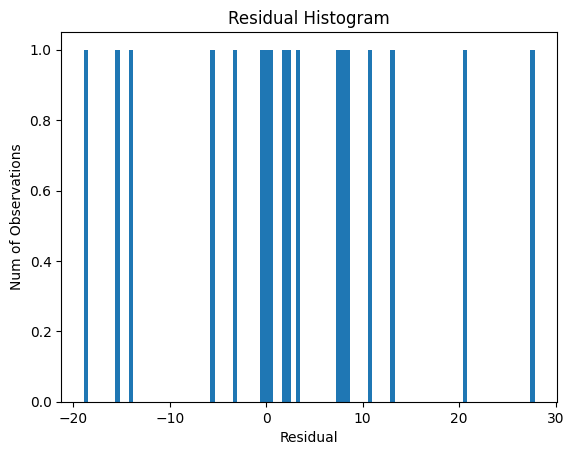

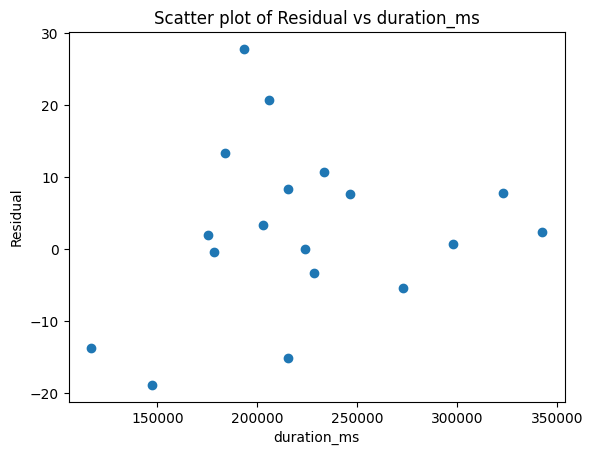

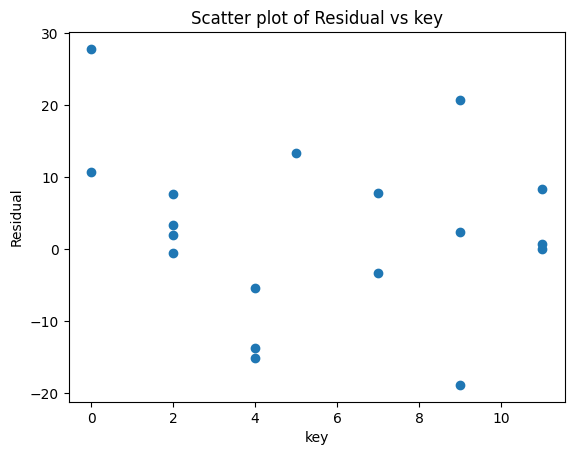

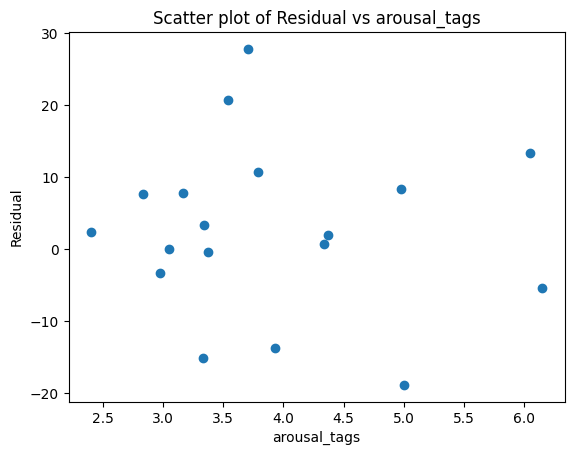

In [28]:
for genre in genres:
    print(f"---------------{genre}--------------------")
    X = X_dict[genre]
    model_df = merged_df[merged_df['genre'] == genre]
    model_df = model_df[X + [Y]]
    print(model_df.corr())
    np.random.seed(448)
    X_train, X_test, y_train, y_test = train_test_split(model_df.loc[:, X], 
                                                        model_df[Y], 
                                                        test_size = 0.2)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    r2_training = regression_model.score(X_train, y_train)
    r2_test = regression_model.score(X_test, y_test)
    print(f"R2 of training: {r2_training}")
    print(f"R2 of test: {r2_test}")
    print(f"Test loss: {np.square(residual(regression_model, X_test, y_test).sum())}")
    plotResidualHistogram(regression_model, X_test, y_test)
    plotResidualsVsAttributes(regression_model, X_test, y_test, X)